# Motivação

O objetivo principal deste trabalho é estudar, entender e implementar as principais técnicas de análise e processamento de linguagem natural. Para que esse trabalho se torne possível, será necessário utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

# Importação de bibliotecas necessárias para o projeto

In [ ]:
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Download de todos os componentes necessários da biblioteca NLTK

In [ ]:
nltk.download('all')
#nltk.download('stopwords')

Para acessar os livros do Harry Potter que estão armazenados no Google Drive, vamos realizar a montagem do Drive para conseguir acessar como se fosse um repositório local de um PC.

**PS: Vamos realizar a montagem apenas uma vez a cada execução do algoritmo, para não gastar processamento desnecessário.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Criação de stopwords

Criando as stopwords em português e inglês

In [ ]:
english_stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

In [ ]:
# Adiciona algumas stopwords em português para tratar algumas divergências analíticas
add_stopwords_pt = ['capitulo', 'capítulo']
portuguese_stopwords.extend(add_stopwords_pt)

# Análise textual - Livros

Criando a função de processamento de texto

<p>O objetivo dessa função e remover as quebras de linhas e alguns caracteres especiais que não foram removidos com o decode</p>

In [ ]:
def processing_text(str_text, _stopwords):
  if not str(str_text).isdigit():
    text_format = re.findall(r'\b[A-zÀ-úü]+\b', str_text.lower())

    if _stopwords:
      no_stopwords = [words for words in text_format if words not in _stopwords and not len(words) == 1]
    else:
      no_stopwords = text_format

  return(' '.join(no_stopwords))

Escolhendo os textos a serem utilizados na função de processamento e realizar leitura de arquivos armazenados no Google Drive

**Foram utilizadas as os livros da escritora J. K. Rowling, especificamente a série do Harry Potter.**

Acessando o repositório que foi montado no Google Drive para coletar a lista de todos os livros da pasta.

In [ ]:
_path_books_drive = '/content/drive/MyDrive/Harry_Potter/'

list_books_hp = sorted(os.listdir(_path_books_drive))

list_books_hp

["Book 1 - The Philosopher's Stone.txt",
 'Book 2 - The Chamber of Secrets.txt',
 'Book 3 - The Prisoner of Azkaban.txt',
 'Book 4 - The Goblet of Fire.txt',
 'Book 5 - The Order of the Phoenix.txt',
 'Book 6 - The Half Blood Prince.txt',
 'Book 7 - The Deathly Hallows.gdoc',
 'Book 7 - The Deathly Hallows.txt',
 'datasets_movies']

Realizar a leitura de cada livro e passar o texto na função de processamento para remover pontuações e stopwords.

In [148]:
#Função responsável por tratar as informações textuais dos livros.
books_hp_no_processed = []
books_hp_processed = []
_footer_removed = []

for book in list_books_hp:
  if book.endswith('.txt'):
    with open(_path_books_drive + book, encoding='utf8') as f:
      _book = ''
      for line in f:
        if not line.startswith("Page |"):
            _book += line
        else:
          _footer_removed.append(line)
      
      books_hp_no_processed.append(_book)
      books_hp_processed.append(processing_text(_book, english_stopwords))

Print do texto sem processamento e com o processamento da função.

In [ ]:
_footer_removed

In [ ]:
books_hp_no_processed[0]

In [ ]:
len(books_hp_processed[0]) #265457

265457

In [ ]:
for i in _footer_removed:
  if "Goblet" in i:
    print(i)

**Códigos de terminal baseados em Linux**

É possível utilizar comandos Linux para navegar pelo diretório depois que ele foi montado no comando acima.

In [ ]:
!dir /content/drive/MyDrive/Harry_Potter/

Book\ 1\ -\ The\ Philosopher's\ Stone.txt
Book\ 2\ -\ The\ Chamber\ of\ Secrets.txt
Book\ 3\ -\ The\ Prisoner\ of\ Azkaban.txt
Book\ 4\ -\ The\ Goblet\ of\ Fire.txt
Book\ 5\ -\ The\ Order\ of\ the\ Phoenix.txt
Book\ 6\ -\ The\ Half\ Blood\ Prince.txt
Book\ 7\ -\ The\ Deathly\ Hallows.gdoc
Book\ 7\ -\ The\ Deathly\ Hallows.txt
datasets_movies


**Tokenização dos textos**

A tokenização, também conhecida como segmentação de palavras, é responsável por quebrar as palavras de cada texto analisado, ou seja, ele identifica o início e o término das palavras do texto e faz a divisão.

- Exemplo sem tokenização: "Harry Potter é a melhor série de todos os tempos"

- Texto tokenizado: "Harry", "Potter", "é", "a", "melhor", "saga", "de", "todos", "os", "tempos"

In [ ]:
# Frase fornecida como "input"
_str = 'Harry Potter é a melhor saga de todas!'

# Função em python para realizar a tokenização, utilizando a biblioteca NLTK
print(nltk.tokenize.word_tokenize(_str))

# Tokenização fornecida como "output"

['Harry', 'Potter', 'é', 'a', 'melhor', 'saga', 'de', 'todas', '!']


In [ ]:
tokens_noprocess_hp_philosopher_stone = nltk.tokenize.word_tokenize(books_hp_no_processed[0])
tokens_hp_philosopher_stone = nltk.tokenize.word_tokenize(books_hp_processed[0])

In [149]:
tokens_hp_philosopher_stone = nltk.tokenize.word_tokenize(books_hp_processed[0])
tokens_hp_chamber_secrets = nltk.tokenize.word_tokenize(books_hp_processed[1])
tokens_hp_azkaban = nltk.tokenize.word_tokenize(books_hp_processed[2])
tokens_hp_goblet_fire = nltk.tokenize.word_tokenize(books_hp_processed[3])
tokens_hp_phoenix = nltk.tokenize.word_tokenize(books_hp_processed[4])
tokens_hp_prince = nltk.tokenize.word_tokenize(books_hp_processed[5])
tokens_hp_hallows = nltk.tokenize.word_tokenize(books_hp_processed[6])

In [ ]:
print(tokens_noprocess_hp_philosopher_stone)
print(tokens_hp_philosopher_stone)

**Análise de frequência de palavras**

Uma distribuição de frequência pode ser usada para registrar a frequência de cada tipo de palavra em um documento, ou seja, essa função tem por objetivo calcular a inscidencia de vezes que uma palavra foi mencionada em um texto, documento, string.

In [150]:
prob_hp_philosopher_stone = nltk.probability.FreqDist(tokens_hp_philosopher_stone)
prob_hp_chamber_secrets = nltk.probability.FreqDist(tokens_hp_chamber_secrets)
prob_hp_azkaban = nltk.probability.FreqDist(tokens_hp_azkaban)
prob_hp_goblet_fire = nltk.probability.FreqDist(tokens_hp_goblet_fire)
prob_hp_phoenix = nltk.probability.FreqDist(tokens_hp_phoenix)
prob_hp_prince = nltk.probability.FreqDist(tokens_hp_prince)
prob_hp_hallows = nltk.probability.FreqDist(tokens_hp_hallows)

In [ ]:
prob_hp_noprocess_philosopher_stone = nltk.probability.FreqDist(tokens_noprocess_hp_philosopher_stone)
prob_hp_philosopher_stone = nltk.probability.FreqDist(tokens_hp_philosopher_stone)

In [ ]:
print(prob_hp_noprocess_philosopher_stone.most_common(5))
print(prob_hp_philosopher_stone.most_common(5))

[(',', 5658), ('.', 4642), ('the', 3312), ('’', 3111), ('“', 2437)]
[('harry', 1325), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 269)]


**Print das 10 palavras que mais se repetem nos textos**

In [ ]:
print(prob_hp_philosopher_stone.most_common(10))
print(prob_hp_chamber_secrets.most_common(10))
print(prob_hp_azkaban.most_common(10))
print(prob_hp_goblet_fire.most_common(10))
print(prob_hp_phoenix.most_common(10))
print(prob_hp_prince.most_common(10))
print(prob_hp_hallows.most_common(10))

[('harry', 1325), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 269), ('back', 261), ('one', 256), ('know', 214), ('got', 207), ('could', 198)]
[('harry', 1656), ('said', 1218), ('ron', 706), ('hermione', 320), ('back', 279), ('lockhart', 234), ('one', 222), ('malfoy', 222), ('could', 211), ('professor', 192)]
[('harry', 2049), ('said', 1477), ('ron', 791), ('hermione', 672), ('professor', 416), ('lupin', 408), ('black', 390), ('back', 353), ('one', 305), ('hagrid', 268)]
[('harry', 3171), ('said', 2638), ('ron', 1043), ('hermione', 871), ('dumbledore', 599), ('back', 589), ('mr', 523), ('around', 490), ('looked', 489), ('one', 488)]
[('harry', 4089), ('said', 3945), ('ron', 1307), ('hermione', 1307), ('back', 791), ('well', 664), ('dumbledore', 661), ('sirius', 646), ('could', 639), ('know', 604)]
[('harry', 2784), ('said', 2441), ('dumbledore', 1034), ('ron', 877), ('hermione', 694), ('could', 482), ('would', 456), ('back', 423), ('one', 409), ('well', 401)]
[('harry', 3

**Print das 10 palavras que menos se repetem nos textos**

In [ ]:
print(prob_hp_hallows.most_common()[-10:])

[('carriages', 1), ('boats', 1), ('friday', 1), ('sincere', 1), ('tactful', 1), ('bravest', 1), ('kisses', 1), ('reminders', 1), ('craned', 1), ('bereavement', 1)]


**Palavra que mais se repete**

In [ ]:
print('Palavra que mais se repete no texto de ' + list_books_hp[0] + ': ' + prob_hp_philosopher_stone.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[1] + ': ' + prob_hp_chamber_secrets.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[2] + ': ' + prob_hp_azkaban.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[3] + ': ' + prob_hp_goblet_fire.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[4] + ': ' + prob_hp_phoenix.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[5] + ': ' + prob_hp_prince.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[6] + ': ' + prob_hp_hallows.max())

Palavra que mais se repete no texto de Book 1 - The Philosopher's Stone.txt: harry
Palavra que mais se repete no texto de Book 2 - The Chamber of Secrets.txt: harry
Palavra que mais se repete no texto de Book 3 - The Prisoner of Azkaban.txt: harry
Palavra que mais se repete no texto de Book 4 - The Goblet of Fire.txt: harry
Palavra que mais se repete no texto de Book 5 - The Order of the Phoenix.txt: harry
Palavra que mais se repete no texto de Book 6 - The Half Blood Prince.txt: harry
Palavra que mais se repete no texto de Book 7 - The Deathly Hallows.txt: harry


**Plot gráfico das análises feitas com as informações tratadas**

In [124]:
#Filtra a quantidade de palavras por livro.
def filter_words(book, count, num_book):
  words = []
  count_words = []
  for i in book.most_common(count):
    words.append(i[0])
    count_words.append(i[1])
  
  return {'words': words, 'qtd_words': count_words, 'title': list_books_hp[num_book].replace('.txt', '')}

In [ ]:
#prob_hp_noprocess_philosopher_stone
#prob_hp_philosopher_stone

In [ ]:
def plot_graph_dispersion(_book):
  colors = np.random.randint(60, size=(len(_book['qtd_words'])))
  
  plt.figure(figsize=(10,4)).patch.set_facecolor((1, 1, 1))
  plt.scatter(np.array(_book['words']), np.array(_book['qtd_words']), c=colors, s=_book['qtd_words'], alpha=0.5)

  plt.xlabel("Palavras")
  plt.ylabel("Quantidade")
  plt.title(_book['title'])

  plt.grid(True)
  #plt.colorbar()
  plt.show()

In [ ]:
def plot_graph_bar(_book):
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

  plt.figure(figsize=(8,4)).patch.set_facecolor((1, 1, 1))
  plt.bar(_book['words'], _book['qtd_words'], label=_book['words'], color=colors, alpha=0.5)

  plt.xlabel("Palavras")
  plt.ylabel("Quantidade")
  plt.title(_book['title'])

  #plt.grid(True)
  #plt.colorbar()
  plt.show()

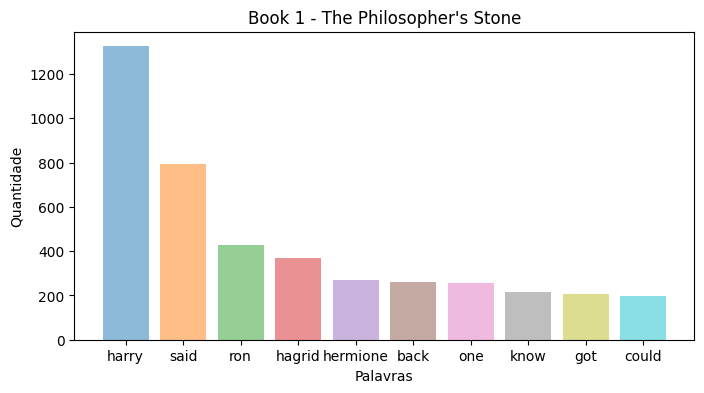

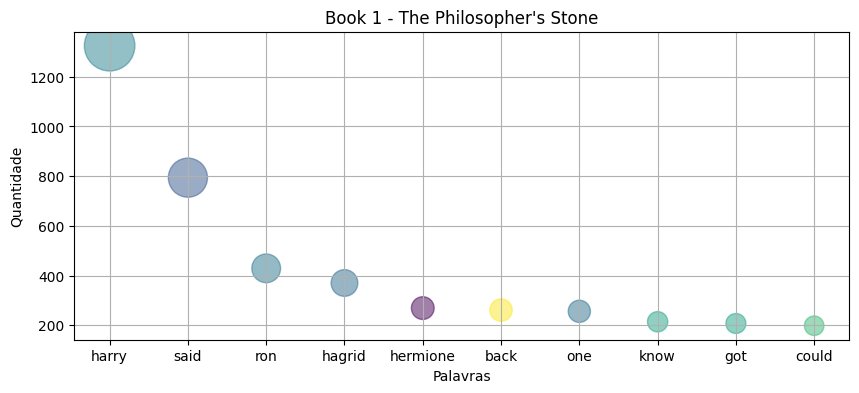

In [125]:
_book = filter_words(prob_hp_philosopher_stone, 10, 0)

#print(words, count_words)
plot_graph_bar(_book)
plot_graph_dispersion(_book)

In [ ]:
_book = filter_book(prob_hp_noprocess_philosopher_stone, 10, 0)

#print(words, count_words)
plot_graph_bar(_book)
plot_graph_dispersion(_book)

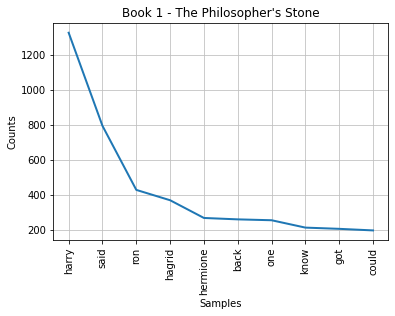

In [ ]:
prob_hp_philosopher_stone.plot(10, title=list_books_hp[0].replace('.txt', ''))

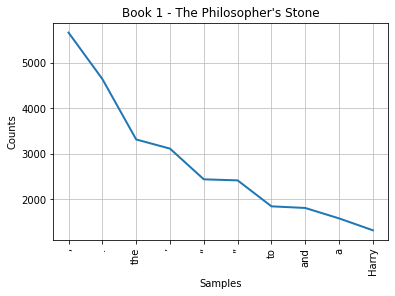

In [ ]:
prob_hp_noprocess_philosopher_stone.plot(10, title=list_books_hp[0].replace('.txt', ''))

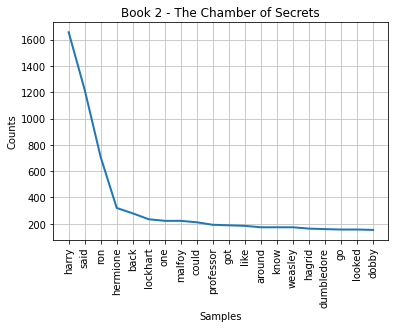

In [ ]:
prob_hp_chamber_secrets.plot(20, title=list_books_hp[1].replace('.txt', ''))

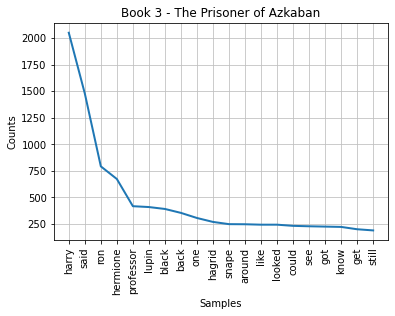

In [ ]:
prob_hp_azkaban.plot(20, title=list_books_hp[2].replace('.txt', ''))

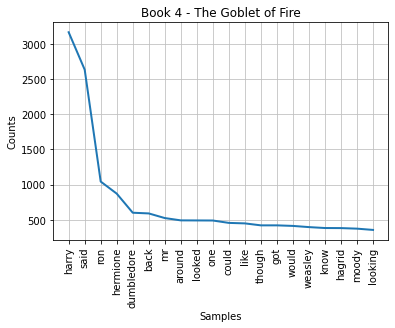

In [ ]:
prob_hp_goblet_fire.plot(20, title=list_books_hp[3].replace('.txt', ''))

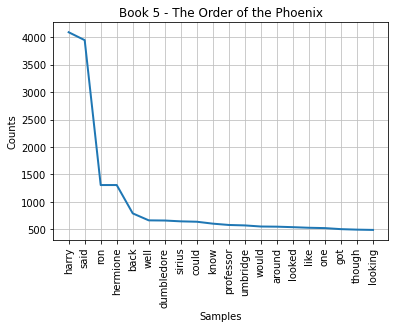

In [ ]:
prob_hp_phoenix.plot(20, title=list_books_hp[4].replace('.txt', ''))

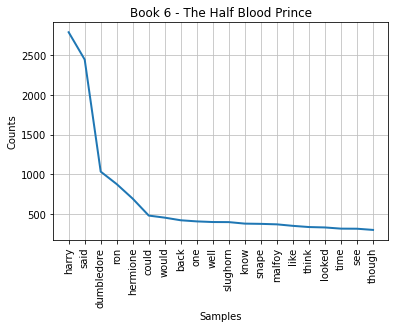

In [ ]:
prob_hp_prince.plot(20, title=list_books_hp[5].replace('.txt', ''))

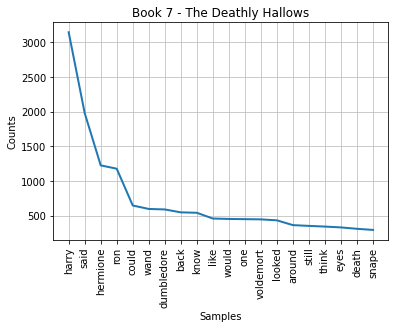

In [ ]:
prob_hp_hallows.plot(20, title=list_books_hp[6].replace('.txt', ''))

In [180]:
analytics_hp_philosopher_stone = nltk.Text(tokens_hp_philosopher_stone)
analytics_hp_chamber_secrets = nltk.Text(tokens_hp_chamber_secrets)
analytics_hp_azkaban = nltk.Text(tokens_hp_azkaban)
analytics_hp_goblet_fire = nltk.Text(tokens_hp_goblet_fire)
analytics_hp_phoenix = nltk.Text(tokens_hp_phoenix)
analytics_hp_prince = nltk.Text(tokens_hp_prince)
analytics_hp_hallows = nltk.Text(tokens_hp_hallows)

**Palavras similares**

In [ ]:
analytics_hp_philosopher_stone.similar('harry')

ron hagrid hermione said malfoy would dumbledore neville snape got get
right voldemort whispered yeh quirrell boy say dudley yes


In [ ]:
analytics_hp_chamber_secrets.similar('basilisk')

said snake serpent


In [ ]:
analytics_hp_azkaban.similar('lupin')

harry hermione ron trelawney mcgonagall dumbledore snape hagrid fudge
witch well fred george quietly malfoy flitwick lavender listen come us


In [182]:
analytics_hp_goblet_fire.similar('cedric')

said harry dobby morning people dinner grounds come look wrong next
see downstairs going soon later moment another nothing least


In [ ]:
analytics_hp_phoenix.similar('bellatrix')

hermione harry ron dumbledore behind see know yes corner nothing lives
good want owl sirius laughing yeah weak noticed er


In [ ]:
analytics_hp_prince.similar('snape')

harry dumbledore slughorn hermione ron scrimgeour said yes malfoy
mcgonagall nothing voldemort tonks fred ginny lupin ogden thought
looking made


In [ ]:
analytics_hp_hallows.similar('voldemort')

harry hermione said dumbledore ron bellatrix lupin wanted felt wand
going think snake say knew doge familiar saw really quietly


**Palavras dentro de diferentes contextos**

In [ ]:
analytics_hp_philosopher_stone.concordance('stone')

Displaying 25 of 80 matches:
snakes crawling slithering bits wood stone dudley piers wanted see huge poisono
ll hagrid folded newspaper clambered stone steps onto street passersby stared l
lin said hagrid quietly walked white stone steps toward goblin head shorter har
rry expected marble surprised narrow stone passageway lit flaming torches slope
ss right shadow castle walked flight stone steps crowded around huge oak front 
l big could fit whole dursleys house stone walls lit flaming torches like ones 
 professor mcgonagall across flagged stone floor harry could hear drone hundred
ul known draught living death bezoar stone taken stomach goat save poisons monk
n twisted blob potion seeping across stone floor burning holes people shoes wit
issed ron pulling harry behind large stone griffin peering around however saw p
ed dramatically known maker sorcerer stone quite effect expected said harry ron
dy alchemy concerned making sorcerer stone legendary substance astonishing powe
gendary sub

In [ ]:
analytics_hp_chamber_secrets.concordance(['basilisk'])

Displaying 25 of 31 matches:
ters roam land none curious deadly basilisk known also king serpents snake may
ndrous aside deadly venomous fangs basilisk murderous stare fixed beam eye sha
 suffer instant death spiders flee basilisk mortal enemy basilisk flees crowin
spiders flee basilisk mortal enemy basilisk flees crowing rooster fatal beneat
on breathed answer monster chamber basilisk giant serpent hearing voice place 
seltongue harry looked beds around basilisk kills people looking one died one 
oked straight eye colin saw camera basilisk burned film inside colin got petri
 petrified justin justin must seen basilisk nearly headless nick nick got full
ror next hermione realized monster basilisk bet anything warned first person m
e chamber opened spiders flee fits basilisk getting around place said ron gian
ool heir slytherin one controlling basilisk going said ron whose eyes flashing
ng try get chamber tell think tell basilisk harry think anything else wanted s
tood listening chill si

In [ ]:
analytics_hp_azkaban.concordance('azkaban')

Displaying 25 of 46 matches:
ossibly infamous prisoner ever held azkaban fortress still eluding capture mini
 ead cos mad inee ern inee mad went azkaban said ern slow voice blow meself set
ure black gaunt face never breakout azkaban ern beats ow frightenin eh mind fan
ow frightenin eh mind fancy chances azkaban guards eh ern ernie suddenly shiver
ered talk summat else stan good lad azkaban guards give collywobbles stan put p
nflating aunt marge bad enough land azkaban harry know anything wizard prison t
et impatiently accident send people azkaban blowing aunts tally harry past deal
cloak oh heard well yet matter time azkaban guards never yet failed angrier eve
 personally let children alone back azkaban harry homework blankets flashlight 
ing caught thirteen year old wizard azkaban guards get back mark words moment m
lack mad maybe clever enough escape azkaban supposed impossible month one seen 
rry perfectly safe hogwarts thought azkaban perfectly safe black break azkaban 
 azkaban pe

In [ ]:
analytics_hp_goblet_fire.concordance('cedric')

Displaying 25 of 268 matches:
ol magical creatures think know son cedric cedric diggory extremely handsome b
cal creatures think know son cedric cedric diggory extremely handsome boy arou
use quidditch team hogwarts hi said cedric looking around everybody said hi ba
 merely nodded never quite forgiven cedric beating team gryffindor first quidd
atch previous year long walk arthur cedric father asked bad said mr weasley li
emained silent fred george scowling cedric looked slightly embarrassed harry f
 harry looked mr weasley mr diggory cedric still standing though looking winds
rd scrubby brown beard amos diggory cedric father stunners went right trees go
emerging crowd eyes gleaming wonder cedric knows think go tell cedric said ron
g wonder cedric knows think go tell cedric said ron blankly ernie hurried digg
 parchment hogwarts champion called cedric diggory said ron loudly nobody hear
puff jumped feet screaming stamping cedric made way past grinning broadly head
hind teachers table in

In [ ]:
analytics_hp_phoenix.concordance('bellatrix')

Displaying 25 of 53 matches:
er small round burn mark two names bellatrix narcissa andromeda sisters still m
y looking name left andromeda burn bellatrix black connected double line rodolp
ius shortly harry looked curiously bellatrix husband rodolphus came barty crouc
her rabastan harry remembered seen bellatrix lestrange inside dumbledore pensie
rial witnessed dumbledore pensieve bellatrix lestrange looks kreacher favorite 
y dumbledore told promised mention bellatrix lestrange got sent azkaban using c
s curse neville parents lost minds bellatrix lestrange whispered hermione horri
thing perhaps azkaban taken beauty bellatrix lestrange convicted torture perman
dline pictures harry concentrating bellatrix yet read mass breakout azkaban min
y individuals include black cousin bellatrix lestrange rallied around black lea
d kept quiet said anything subject bellatrix fellow torturers escape fact barel
 yeah said harry tearing eyes away bellatrix lestrange face glance high street 
 crumple ho

In [ ]:
analytics_hp_prince.concordance('unbreakable')

Displaying 8 of 8 matches:
d lips protect severus swear make unbreakable vow unbreakable vow snape express
everus swear make unbreakable vow unbreakable vow snape expression blank unread
and certainly narcissa shall make unbreakable vow said quietly perhaps sister c
d harry thought heard sob slammed unbreakable vow snow swirling icy windows chr
p swore mother would protect made unbreakable vow draco looks like break need p
omised malfoy mother protect made unbreakable oath something unbreakable vow sa
t made unbreakable oath something unbreakable vow said ron looking stunned nah 
s sure said harry mean well break unbreakable vow worked much funnily enough ha


In [ ]:
analytics_hp_hallows.concordance('kedavra')

Displaying 4 of 4 matches:
 impassive turned slowly away avada kedavra flash green light illuminated every
stan stunned fallen died used avada kedavra expelliarmus saved voldemort two ye
nd hand laughed casting curse avada kedavra green light filled cramped hallway 
 small ones whining orphanage avada kedavra broke nothing nothing pain terror m


**Bigramas de texto**

In [ ]:
analytics_hp_philosopher_stone.collocations()

uncle vernon; professor mcgonagall; aunt petunia; said ron; said
hagrid; said harry; crabbe goyle; privet drive; common room; fred
george; madam pomfrey; mrs dursley; invisibility cloak; mrs norris;
nimbus two; madam hooch; nicolas flamel; leaky cauldron; first years;
sorcerer stone


In [ ]:
analytics_hp_chamber_secrets.collocations()

professor mcgonagall; said ron; uncle vernon; mrs weasley; chamber
secrets; fred george; headless nick; said harry; madam pomfrey; nearly
headless; harry potter; gilderoy lockhart; moaning myrtle; aunt
petunia; hospital wing; mrs norris; common room; sorting hat;
professor sprout; crabbe goyle


In [ ]:
analytics_hp_azkaban.collocations()

uncle vernon; professor mcgonagall; professor trelawney; professor
lupin; aunt marge; said ron; madam pomfrey; common room; said harry;
crabbe goyle; fred george; ron hermione; expecto patronum; sirius
black; hospital wing; said hermione; mrs weasley; invisibility cloak;
dark arts; aunt petunia


In [ ]:
analytics_hp_goblet_fire.collocations()

madame maxime; mrs weasley; uncle vernon; rita skeeter; said ron;
professor mcgonagall; death eaters; said harry; fred george; world
cup; aunt petunia; said hermione; ron hermione; ludo bagman; daily
prophet; great hall; entrance hall; common room; crabbe goyle;
invisibility cloak


In [ ]:
analytics_hp_phoenix.collocations()

mrs weasley; professor mcgonagall; said harry; uncle vernon; said
hermione; professor umbridge; fred george; death eaters; said ron;
aunt petunia; grubbly plank; department mysteries; daily prophet; dark
arts; ministry magic; common room; death eater; professor trelawney;
defense dark; ron hermione


In [ ]:
analytics_hp_prince.collocations()

mrs weasley; prime minister; said harry; said dumbledore; death
eaters; professor mcgonagall; said hermione; dark lord; death eater;
common room; said ron; invisibility cloak; fred george; dark arts;
felix felicis; madam pomfrey; ron hermione; professor trelawney; room
requirement; lord voldemort


In [ ]:
analytics_hp_hallows.collocations()

death eaters; mrs weasley; said harry; godric hollow; invisibility
cloak; said ron; death eater; ron hermione; said hermione; professor
mcgonagall; mad eye; phineas nigellus; elder wand; deathly hallows;
uncle vernon; dark lord; auntie muriel; fred george; beaded bag; bill
fleur


# Análise textual - Filmes

In [ ]:
import os

_path_movie_drive = '/content/drive/MyDrive/Harry_Potter/datasets_movies/'

list_movies_hp = sorted(os.listdir(_path_movie_drive))

list_movies_hp

In [ ]:
movies_csv = pd.read_csv(os.path.join(_path_movie_drive, 'movies.csv'), sep=';')
movies_csv

In [199]:
#Função responsável por tratar as informações textuais dos dialogos dos filmes.
movies_hp_processed = []
movies_hp_no_processed = []

for i in range(len(movies_csv['file'])):
  movies = pd.read_csv(os.path.join(_path_movie_drive, f'hp{i+1}.csv'))
  _str_movies = ''

  for movie in movies['dialog']:
    if type(movie) == str:
      _str_movies += movie

  movies_hp_no_processed.append(_str_movies)
  movies_hp_processed.append(processing_text(_str_movies, english_stopwords))

In [144]:
len(two_movies_hallows) #31408 + 18685

50093

In [ ]:
hp1 = pd.read_csv(os.path.join(_path_movie_drive, 'hp1.csv'))
hp1

In [143]:
tokens_movie_hp_philosopher_stone = nltk.tokenize.word_tokenize(movies_hp_processed[0])
tokens_movie_hp_chamber_secrets = nltk.tokenize.word_tokenize(movies_hp_processed[1])
tokens_movie_hp_azkaban = nltk.tokenize.word_tokenize(movies_hp_processed[2])
tokens_movie_hp_goblet_fire = nltk.tokenize.word_tokenize(movies_hp_processed[3])
tokens_movie_hp_phoenix = nltk.tokenize.word_tokenize(movies_hp_processed[4])
tokens_movie_hp_prince = nltk.tokenize.word_tokenize(movies_hp_processed[5])

two_movies_hallows = movies_hp_processed[6] + movies_hp_processed[7]
tokens_movie_hp_hallows = nltk.tokenize.word_tokenize(two_movies_hallows)

In [200]:
tokens_movie_hp_philosopher_stone_noprocess = nltk.tokenize.word_tokenize(movies_hp_no_processed[0])

In [145]:
prob_movie_hp_philosopher_stone = nltk.probability.FreqDist(tokens_movie_hp_philosopher_stone)
prob_movie_hp_chamber_secrets = nltk.probability.FreqDist(tokens_movie_hp_chamber_secrets)
prob_movie_hp_azkaban = nltk.probability.FreqDist(tokens_movie_hp_azkaban)
prob_movie_hp_goblet_fire = nltk.probability.FreqDist(tokens_movie_hp_goblet_fire)
prob_movie_hp_phoenix = nltk.probability.FreqDist(tokens_movie_hp_phoenix)
prob_movie_hp_prince = nltk.probability.FreqDist(tokens_movie_hp_prince)
prob_movie_hp_hallows = nltk.probability.FreqDist(tokens_movie_hp_hallows)

In [201]:
prob_movie_hp_philosopher_stone_noprocess = nltk.probability.FreqDist(tokens_movie_hp_philosopher_stone_noprocess)

In [146]:
print(prob_movie_hp_philosopher_stone.most_common(10))
print(prob_movie_hp_chamber_secrets.most_common(10))
print(prob_movie_hp_azkaban.most_common(10))
print(prob_movie_hp_goblet_fire.most_common(10))
print(prob_movie_hp_phoenix.most_common(10))
print(prob_movie_hp_prince.most_common(10))
print(prob_movie_hp_hallows.most_common(10))

[('harry', 95), ('go', 58), ('oh', 53), ('know', 51), ('one', 49), ('potter', 44), ('well', 44), ('see', 44), ('got', 42), ('come', 39)]
[('harry', 106), ('dobby', 62), ('go', 58), ('oh', 58), ('come', 57), ('potter', 56), ('well', 56), ('ha', 51), ('think', 46), ('sir', 44)]
[('harry', 95), ('come', 72), ('well', 58), ('know', 49), ('one', 40), ('oh', 39), ('see', 38), ('think', 38), ('ron', 38), ('go', 37)]
[('harry', 80), ('know', 53), ('one', 41), ('well', 38), ('potter', 33), ('get', 32), ('think', 29), ('see', 27), ('go', 23), ('like', 23)]
[('harry', 122), ('potter', 74), ('well', 61), ('know', 50), ('dumbledore', 43), ('right', 38), ('us', 35), ('go', 34), ('come', 34), ('got', 34)]
[('know', 82), ('harry', 80), ('one', 74), ('sir', 71), ('think', 51), ('well', 47), ('like', 47), ('yes', 38), ('see', 36), ('professor', 35)]
[('harry', 132), ('know', 102), ('one', 78), ('well', 70), ('think', 69), ('potter', 63), ('like', 59), ('right', 54), ('would', 53), ('hermione', 52)]


In [202]:
print(prob_movie_hp_philosopher_stone_noprocess.most_common(10))

[(',', 796), ('.', 617), ('!', 447), ('?', 325), ('you', 303), ('the', 252), ("'s", 251), ('I', 249), ('to', 239), ('a', 179)]


In [166]:
def count_words(arr_freqdist):
  count_words = 0
  for i in arr_freqdist:
    count_words = count_words + i[1]

  return(count_words)

In [173]:
count_words_movie_philosopher_stone = count_words(prob_movie_hp_philosopher_stone.most_common())
count_words_movie_chamber_secrets = count_words(prob_movie_hp_chamber_secrets.most_common())
count_words_movie_azkaban = count_words(prob_movie_hp_azkaban.most_common())
count_words_movie_goblet_fire = count_words(prob_movie_hp_goblet_fire.most_common())
count_words_movie_prince = count_words(prob_movie_hp_prince.most_common())
count_words_movie_phoenix = count_words(prob_movie_hp_phoenix.most_common())
count_words_movie_hallows = count_words(prob_movie_hp_hallows.most_common())

In [206]:
count_words_movie_philosopher_stone_noprocess = count_words(prob_movie_hp_philosopher_stone_noprocess.most_common())
count_words_book_philosopher_stone_noprocess = count_words(prob_hp_noprocess_philosopher_stone.most_common())

In [174]:
count_words_book_philosopher_stone = count_words(prob_hp_philosopher_stone.most_common())
count_words_book_chamber_secrets = count_words(prob_hp_chamber_secrets.most_common())
count_words_book_azkaban = count_words(prob_hp_azkaban.most_common())
count_words_book_goblet_fire = count_words(prob_hp_goblet_fire.most_common())
count_words_book_prince = count_words(prob_hp_prince.most_common())
count_words_book_phoenix = count_words(prob_hp_phoenix.most_common())
count_words_book_hallows = count_words(prob_hp_hallows.most_common())

In [186]:
print(list_books_hp[0].replace('Book 1 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_philosopher_stone, ' / Book: ', count_words_book_philosopher_stone)
print(list_books_hp[1].replace('Book 2 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_chamber_secrets, ' / Book: ', count_words_book_chamber_secrets)
print(list_books_hp[2].replace('Book 3 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_azkaban, ' / Book: ', count_words_book_azkaban)
print(list_books_hp[3].replace('Book 4 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_goblet_fire, ' / Book: ', count_words_book_goblet_fire)
print(list_books_hp[4].replace('Book 5 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_prince, ' / Book: ', count_words_book_prince)
print(list_books_hp[5].replace('Book 6 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_phoenix, ' / Book: ', count_words_book_phoenix)
print(list_books_hp[7].replace('Book 7 - ', '').replace('.txt', ''), '- Movie: ', count_words_movie_hallows, ' / Book: ', count_words_book_hallows)

The Philosopher's Stone - Movie:  4812  / Book:  40701
The Chamber of Secrets - Movie:  5443  / Book:  46314
The Prisoner of Azkaban - Movie:  4761  / Book:  57843
The Goblet of Fire - Movie:  3950  / Book:  101482
The Order of the Phoenix - Movie:  5393  / Book:  88402
The Half Blood Prince - Movie:  4610  / Book:  135968
The Deathly Hallows - Movie:  7795  / Book:  102515


In [207]:
print(count_words_movie_philosopher_stone_noprocess, count_words_book_philosopher_stone_noprocess)

12273 101227


In [189]:
analytics_movie_hp_philosopher_stone = nltk.Text(tokens_movie_hp_philosopher_stone)
analytics_movie_hp_chamber_secrets = nltk.Text(tokens_movie_hp_chamber_secrets)
analytics_movie_hp_azkaban = nltk.Text(tokens_movie_hp_azkaban)
analytics_movie_hp_goblet_fire = nltk.Text(tokens_movie_hp_goblet_fire)
analytics_movie_hp_phoenix = nltk.Text(tokens_movie_hp_phoenix)
analytics_movie_hp_prince = nltk.Text(tokens_movie_hp_prince)
analytics_movie_hp_hallows = nltk.Text(tokens_movie_hp_hallows)

In [196]:
analytics_movie_hp_chamber_secrets.collocations()

chamber secrets; harry potter; mrs norris; moaning myrtle; muggle
borns; ahh ahh; years ago; crabbe goyle; fifty years; polyjuice
potion; professor dumbledore; tom riddle; heir slytherin; huh huh;
lord voldemort; salazar slytherin; miss granger; kill kill; arania
exumai; daily prophet


In [197]:
analytics_movie_hp_chamber_secrets.concordance('chamber')

Displaying 25 of 31 matches:
 seen spiders act like like spiders chamber secrets opened enemies heir beware 
r professor wondering could tell us chamber secrets well well well know course 
rding legend slytherin built hidden chamber castle known chamber secrets though
n built hidden chamber castle known chamber secrets though shortly departing se
d school heir alone would able open chamber unleash horror within purge school 
aturally school searched many times chamber found professor exactly legend tell
 exactly legend tell us lies within chamber well chamber said home something he
nd tell us lies within chamber well chamber said home something heir slytherin 
ome monster think true think really chamber secrets yes tell mcgonagall worried
nagall worried teachers well really chamber secrets really opened means heir sl
hogwarts longer safe feared minerva chamber secrets indeed opened mean chamber 
 chamber secrets indeed opened mean chamber secrets opened course see lucius ma
s tell fath

In [198]:
analytics_hp_chamber_secrets.concordance('chamber')

Displaying 25 of 85 matches:
immering light cast flaming torches chamber secrets opened enemies heir beware 
arry whole thing weird writing wall chamber opened supposed mean know rings sor
wly think someone told story secret chamber hogwarts might bill earth squib sai
lse wants said hermione read legend chamber secrets said harry quickly remember
or wondering could tell us anything chamber secrets said hermione clear voice d
nterest oh well said slowly let see chamber secrets know course hogwarts founde
nest facts obscured fanciful legend chamber secrets story goes slytherin built 
s story goes slytherin built hidden chamber castle founders knew nothing slythe
g slytherin according legend sealed chamber secrets none would able open true h
school heir alone would able unseal chamber secrets unleash horror within use p
 naturally school searched evidence chamber many times learned witches wizards 
 air sir exactly mean horror within chamber believed sort monster heir slytheri
aid profess

In [187]:
hp1 = pd.read_csv(os.path.join(_path_movie_drive, 'hp1.csv'))
hp2 = pd.read_csv(os.path.join(_path_movie_drive, 'hp2.csv'))

In [188]:
for i in hp2['character'].drop_duplicates():
  print(i)

Harry Potter
Vernon Dursley
Petunia Dursley
Dudley Dursley
Dobby
Ron Weasley
George Weasley
Fred Weasley
Molly Weasley
Ginny Weasley
Arthur Weasley
Percy Weasley
Other
Witch
Rubeus Hagrid
Hermione Granger
Photographer
Gilderoy Lockhart
Draco Malfoy
Lucius Malfoy
Station guard
Whomping Willow
Argus Filch
Severus Snape
Albus Dumbledore
Minerva McGonagall
Pomona Sprout
All
Neville Longbottom
Seamus Finnigan
Nearly Headless Nick
Collin Creevey
Dean Thomas
Students
Howler
Pixie
Oliver Wood
Marcus Flint
Basilisk
Poppy Pomfrey
Man in a painting
Lee Jordan
Moaning Myrtle
Vincent Crabbe
Justin Finch-Fletchley
Sorting Hat
Gregory Goyle
Diary
Tom Riddle
Cornelius Fudge
Aragog


# Categorias - Filtro por gêneros

In [ ]:
categories = nltk.corpus.brown.categories()
categories

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
fiction_words = nltk.corpus.brown.words(categories='fiction')
hobbies_words = nltk.corpus.brown.words(categories='hobbies')
adventure_words = nltk.corpus.brown.words(categories='adventure')

In [ ]:
frequencia_palavras = sum([prob_hp_chamber_secrets[palavra] for palavra in fiction_words])
frequencia_palavras

975384

In [ ]:
frequencia_palavras = sum([prob_hp_chamber_secrets[palavra] for palavra in hobbies_words])
frequencia_palavras

548378

In [ ]:
frequencia_palavras = sum([prob_hp_chamber_secrets[palavra] for palavra in adventure_words])
frequencia_palavras

1132190

# Etapa de testes

In [ ]:
from nltk.util import unique_list

In [ ]:
corpus = nltk.corpus.brown.tagged_sents(categories='mystery')
print(corpus)

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]


In [ ]:
tag_set = unique_list(tag for sent in corpus for (word,tag) in sent)
print(len(tag_set))

symbols = unique_list(word for sent in corpus for (word,tag) in sent)
print(len(symbols))

trainer = nltk.tag.HiddenMarkovModelTrainer(tag_set, symbols)

169
6982


In [ ]:
train_corpus = []
test_corpus = []
for i in range(len(corpus)):
     if i % 10:
         train_corpus += [corpus[i]]
     else:
         test_corpus += [corpus[i]]
print(train_corpus)

print(test_corpus)

[[('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], [('I', 'PPSS'), ('felt', 'VBD'), ('lonely', 'JJ'), ('and', 'CC'), ('depressed', 'VBD'), ('as', 'CS'), ('I', 'PPSS'), ('stared', 'VBD'), ('out', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('window', 'NN'), ('at', 'IN'), ("Chicago's", 'NP$'), ('grim', 'JJ'), (',', ','), ('dirty', 'JJ'), ('West', 'JJ-TL'), ('Side', 'NN-TL'), ('.', '.')], [('It', 'PPS'), ('seemed', 'VBD'), ('incredible', 'JJ'), (',', ','), ('as', 'CS'), ('I', 'PPSS'), ('listened', 'VBD'), ('to', 'IN'), ('the', 'AT'), ('monotonous', 'JJ'), ('drone', 'NN'), ('of', 'IN'), ('voices', 'NNS'), ('and', 'CC'), ('smelled', 'VBD'), ('the', 'AT'), ('fetid', 'JJ'), ('odors', 'NNS'), ('coming', 'VBG'), ('from', 'IN'), ('the', 'AT'), ('patients', 'NNS'), (',', ','), ('that', 'CS'), ('technically', 'RB'), ('I', 'PPSS'), ('was'

In [ ]:
prob_hp_chamber_secrets

FreqDist({'harry': 1656, 'said': 1218, 'ron': 706, 'hermione': 320, 'back': 279, 'lockhart': 234, 'one': 222, 'malfoy': 222, 'could': 211, 'professor': 192, ...})

In [ ]:
frequencia_palavras = sum([prob_hp_philosopher_stone[palavra] for palavra in tokens_hp_chamber_secrets])

In [ ]:
frequencia_palavras

5215582

In [ ]:
pf = nltk.SimpleGoodTuringProbDist(prob_hp_noprocess_philosopher_stone)
pf1 = nltk.SimpleGoodTuringProbDist(prob_hp_philosopher_stone)

In [ ]:
pf.prob('said')

0.007873853984002768

In [ ]:
pf1.prob('said')

0.019725371412526848

In [ ]:
pf.prob('said')

0.007873853984002768

In [ ]:
list(prob_hp_philosopher_stone._cumulative_frequencies(['harry']))

[1325.0]

In [ ]:
print(nltk.corpus.brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [ ]:
words_mystery = nltk.corpus.brown.words(categories='mystery')

categories = nltk.corpus.brown.categories()

words = nltk.corpus.brown.words()

print(len(words_mystery))

print(len(nltk.corpus.brown.words(categories='fiction')))

print(len(words))

57169
68488
1161192


In [ ]:
categories

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
for i in categories:
  print(i + ' => Words: ' + str(len(nltk.corpus.brown.words(categories=i))))

adventure => Words: 69342
belles_lettres => Words: 173096
editorial => Words: 61604
fiction => Words: 68488
government => Words: 70117
hobbies => Words: 82345
humor => Words: 21695
learned => Words: 181888
lore => Words: 110299
mystery => Words: 57169
news => Words: 100554
religion => Words: 39399
reviews => Words: 40704
romance => Words: 70022
science_fiction => Words: 14470


# Teste de leitura de informações coletadas em um site

In [ ]:
import urllib.request

#"https://www.gutenberg.org/files/68611/68611-0.txt"

text_web = urllib.request.urlopen("https://www.gutenberg.org/files/68611/68611-0.txt").read()

book_gutemberg = processing_text(str(text_web, 'utf8'), english_stopwords)

print(book_gutemberg)

project gutenberg ebook science modern world alfred north whitehead ebook use anyone anywhere united states parts world cost almost restrictions whatsoever may copy give away use terms project gutenberg license included ebook online www gutenberg org located united states check laws country located using ebook title science modern world lowell lectures author alfred north whitehead release date july ebook language english produced kd weeks steve mattern online distributed proofreading team https www pgdp net file produced images generously made available internet archive start project gutenberg ebook science modern world transcriber note version text cannot represent certain typographical effects italics delimited character _italic_ superscripted characters prefixed delimited footnotes moved follow paragraphs referenced minor errors attributable printer corrected please see transcriber note end text details regarding handling textual issues encountered preparation science modern world 